In [13]:
# %% Read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

path = "GNNs_Jan_stats.csv"  # update if needed
df = pd.read_csv(path).rename(columns={"Unnamed: 3": "type"})

for c in ["val_auc_trade", "val_auc_dir", "test_auc_trade", "test_auc_dir"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["val_auc_trade"] = df["val_auc_trade"].fillna(0)
df["test_auc_trade"] = df["test_auc_trade"].fillna(0)

type_to_arrow = {"Post-CV check": "gray", "Full Refit check": "black"}


In [14]:
# %% Read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

path = "GNNs_Jan_stats.csv"  # update if needed
df = pd.read_csv(path).rename(columns={"Unnamed: 3": "type"})

for c in ["val_auc_trade", "val_auc_dir", "test_auc_trade", "test_auc_dir"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["val_auc_trade"] = df["val_auc_trade"].fillna(0)
df["test_auc_trade"] = df["test_auc_trade"].fillna(0)

type_to_arrow = {"Post-CV check": "gray", "Full Refit check": "black"}

def add_ref_lines(ax):
    ax.axvline(0.5, lw=1.6, color="k", alpha=0.4, zorder=0.6)
    ax.axhline(0.5, lw=1.6, color="k", alpha=0.4, zorder=0.6)
    for v in [0.6, 0.7, 0.8, 0.9]:
        ax.axvline(v, lw=1.0, color="k", alpha=0.1, zorder=0.5)
        ax.axhline(v, lw=1.0, color="k", alpha=0.1, zorder=0.5)

def plot_freq(freq):
    d = df[df["freq"] == freq].copy()
    has_test = d["test_auc_dir"].notna()

    pnl = pd.to_numeric(d["pnl_sum"], errors="coerce").fillna(0).to_numpy()
    pos_max = pnl[pnl > 0].max() if np.any(pnl > 0) else 0.0

    def pnl_color(p):
        if p > 0 and pos_max > 0:
            return plt.cm.Greens(0.3 + 0.7 * min(p / pos_max, 1.0))
        return (0.8, 0.2, 0.2, 0.4)

    colors = [pnl_color(p) for p in pnl]

    x_val, y_val = d["val_auc_trade"].to_numpy(), d["val_auc_dir"].to_numpy()
    x_tst, y_tst = d.loc[has_test, "test_auc_trade"].to_numpy(), d.loc[has_test, "test_auc_dir"].to_numpy()
    colors_tst = [colors[i] for i in np.where(has_test.to_numpy())[0]]

    fig, ax = plt.subplots(figsize=(10, 7))
    add_ref_lines(ax)

    ax.scatter(x_val, y_val, marker="o", s=90, c=colors, edgecolors="k", linewidths=0.4, zorder=3)
    ax.scatter(x_tst, y_tst, marker="s", s=90, c=colors_tst, edgecolors="k", linewidths=0.4, zorder=4)

    for r in d.loc[has_test].itertuples(index=False):
        ax.annotate(
            "",
            xy=(r.test_auc_trade, r.test_auc_dir),
            xytext=(r.val_auc_trade, r.val_auc_dir),
            arrowprops=dict(arrowstyle="->", lw=1.2, color=type_to_arrow.get(r.type, "gray")),
            zorder=2,
        )

    for x, y, name in zip(x_val, y_val, d["Model type"].astype(str).to_list()):
        ax.text(x + 0.01, y + 0.01, name, fontsize=8)

    ax.set_title(f"{freq}: AUC trade vs AUC dir")
    ax.set_xlabel("auc_trade")
    ax.set_ylabel("auc_dir")
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.grid(True, alpha=0.25)

    ax.legend(
        handles=[
            Line2D([0], [0], marker="o", linestyle="None", markerfacecolor="white", markeredgecolor="k", label="val point"),
            Line2D([0], [0], marker="s", linestyle="None", markerfacecolor="white", markeredgecolor="k", label="test point"),
            Line2D([0], [0], color="gray", lw=1.2, label="Post-CV check arrow"),
            Line2D([0], [0], color="black", lw=1.2, label="Full Refit check arrow"),
        ],
        frameon=False,
        loc="lower right",
    )

    plt.show()


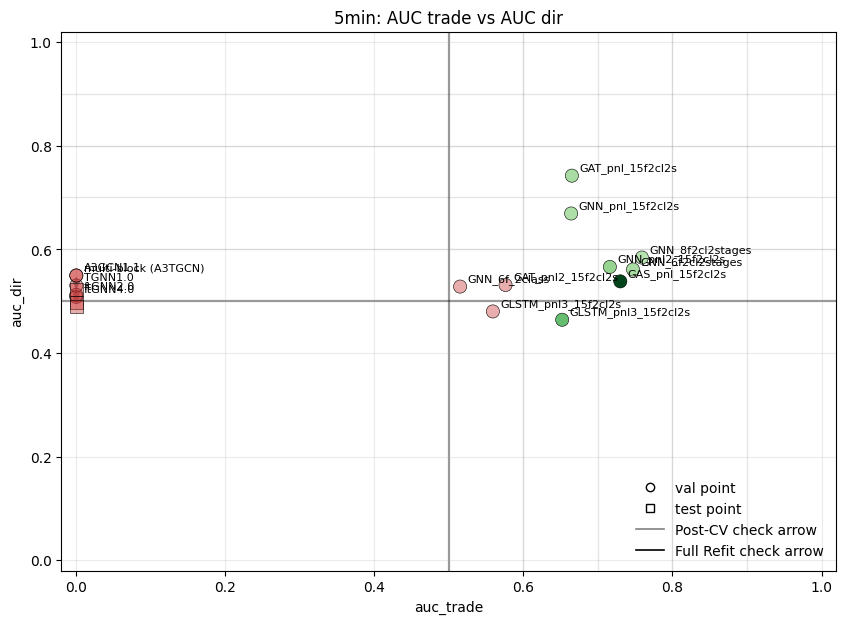

In [15]:

# %% Plot 5min
plot_freq("5min")



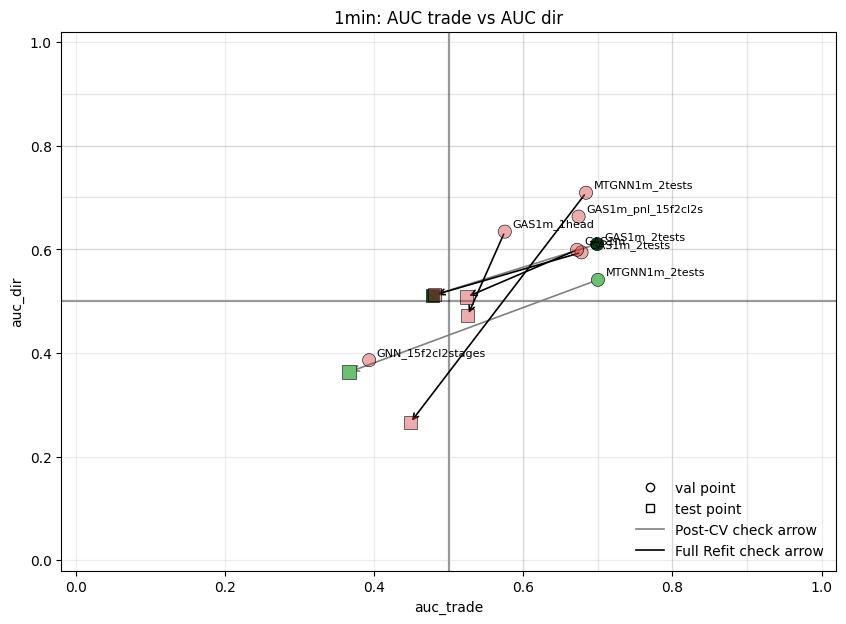

In [16]:

# %% Plot 1min
plot_freq("1min")
